In [91]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import hist

In [92]:
with open("qjetmass_zjets_gen.pkl", "rb") as f:
    output = pickle.load( f )

In [93]:
h = output['ptfrac_z_jet_reco']
hlist = []
for i in range(h.axes[1].size-1):
    hlist.append(h[sum,i:i+1,:].values())





[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f27a64fc250>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

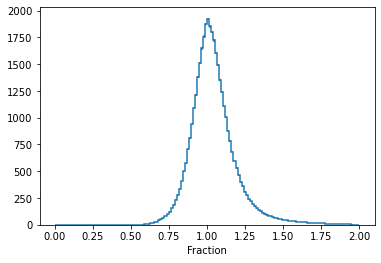

In [94]:
h.project('frac').plot()

In [95]:
frac_values = h.axes[2].centers
binlength = frac_values[2] - frac_values[0]

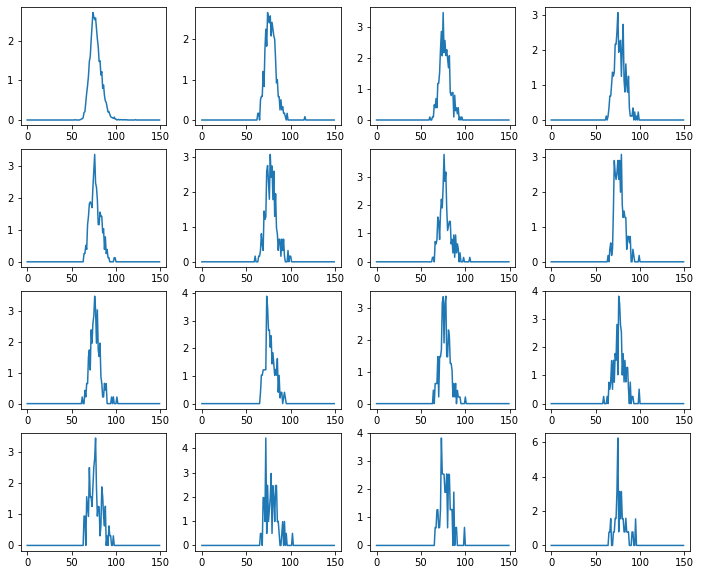

In [96]:
fig, ax = plt.subplots(nrows=4, ncols=4,figsize = (12,10))
hlist_plot = hlist[:16]
for i,h in enumerate(hlist_plot):
        row = (i )//4 
        col = (i ) % 4

        h[0] = h[0]/(np.sum(h[0])*binlength)
        ax[row][col].plot(h[0])



In [97]:
from scipy.optimize import curve_fit

# def gauss(x,  x0, sigma,a):
#     return (a*(1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(x - x0) ** 2 / (2 * sigma ** 2)))

# def bw(x, x0, gamma,k):
#     """
#     Returns the relativistic Breit-Wigner distribution for mass m,
#     resonance mass m0 and width gamma.
#     """
#     #k = 2 * np.sqrt(2) * m0 * gamma * np.sqrt(m0**2 * (m0**2 + gamma**2))
#     return k / ((x**2 - x0**2)**2 + (x**2)*gamma**2)

# parameters, covariance = curve_fit(gauss, frac_values, hlist[1][0],bounds = ([0.5,0.05,-5],[2,0.3,5]))
# parameters1, covariance1 = curve_fit(bw, frac_values, hlist[1][0])

# mean = parameters[0]
# sigma = parameters[1]
# const = parameters[2]

# plt.figure(figsize = (16,5))
# print(const)

# plt.subplot(121)
# fit_dist2 = bw(frac_values,parameters1[0],parameters1[1],parameters1[2])
# plt.plot(frac_values,fit_dist2,'g--',label = 'bw fit')

# plt.plot(frac_values,hlist[1][0], 'r',label = 'data')
# plt.legend()


# plt.subplot(122)
# fit_dist = gauss(frac_values,mean,sigma,const)
# plt.plot(frac_values,fit_dist,'b--',label = 'gauss fit')

# plt.plot(frac_values,hlist[1][0], 'r',label = 'data')
# plt.legend()

In [98]:
from scipy.optimize import curve_fit
class Histfit:
    def __init__(self, histList):
        self.histList = histList
        self.N = len(histList)
        self.gaussMeanList = np.zeros(self.N)
        self.gaussWidthList = np.zeros(self.N)
        self.gaussConstList = np.zeros(self.N)
        self.bwMeanList = np.zeros(self.N)
        self.bwWidthList = np.zeros(self.N)
        self.bwConstList = np.zeros(self.N)
    def gauss(self,x,  x0, sigma,a):
        return (a*(1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(x - x0) ** 2 / (2 * sigma ** 2)))

    def bw(self,x, x0, gamma,k):
        """
        Returns the relativistic Breit-Wigner distribution for mass m,
        resonance mass m0 and width gamma.
        """
        #k = 2 * np.sqrt(2) * m0 * gamma * np.sqrt(m0**2 * (m0**2 + gamma**2))
        return k / ((x**2 - x0**2)**2 + (x**2)*gamma**2)

    
    def fitGauss(self,hist):
        parameters, covariance = curve_fit(self.gauss, frac_values, hist,bounds = ([0.5,0.05,-5],[2,0.3,5]))
        mean = parameters[0]
        sigma = parameters[1]
        const = parameters[2]
        return mean,sigma,const
    
    def fitbw(self,hist):
        parameters, covariance = curve_fit(self.bw, frac_values, hist,bounds = ([0.5,0.05,-5],[2,0.3,5]))
        mean = parameters[0]
        sigma = parameters[1]
        const = parameters[2]
        return mean,sigma,const
    
    def storeParameters(self):
        for i in range(len(self.histList)):
            hist = self.histList[i][0]
            parameters = self.fitGauss(hist)
            self.gaussMeanList[i] = parameters[0]
            self.gaussWidthList[i] = parameters[1]
            self.gaussConstList[i] = parameters[2]
            parameters = self.fitbw(hist)
            self.bwMeanList[i] = parameters[0]
            self.bwWidthList[i] = parameters[1]
            self.bwConstList[i] = parameters[2]
            
    def plotGaussparameters(self):
        plt.figure(figsize = (16,5))
        plt.subplot(131)
        plt.plot(10*np.arange(self.N),self.gaussMeanList)
        plt.xlabel("pt,GeV")
        plt.ylabel("Mean")
        plt.subplot(132)
        plt.plot(10*np.arange(self.N),self.gaussWidthList)
        plt.xlabel("pt,GeV")
        plt.ylabel("Width")
        plt.subplot(133)
        plt.plot(10*np.arange(self.N),self.gaussConstList)
        plt.xlabel("pt,GeV")
        plt.ylabel("Const")
    def plotBWparameters(self):
        plt.figure(figsize = (16,5))
        plt.subplot(131)
        plt.plot(10*np.arange(self.N),self.bwMeanList)
        plt.xlabel("pt,GeV")
        plt.ylabel("Mean")
        plt.subplot(132)
        plt.plot(10*np.arange(self.N),self.bwWidthList)
        plt.xlabel("pt,GeV")
        plt.ylabel("Width")
        plt.subplot(133)
        plt.plot(10*np.arange(self.N),self.bwConstList)
        plt.xlabel("pt,GeV")
        plt.ylabel("Const")
    def showFit(self,n):
        parameters, covariance = curve_fit(self.gauss, frac_values, self.histList[n][0],bounds = ([0.5,0.05,-5],[2,0.3,5]))
        parameters1, covariance1 = curve_fit(self.bw, frac_values, self.histList[n][0])

        mean = parameters[0]
        sigma = parameters[1]
        const = parameters[2]

        plt.figure(figsize = (16,5))
        plt.subplot(121)
        fit_dist2 = self.bw(frac_values,parameters1[0],parameters1[1],parameters1[2])
        plt.plot(frac_values,fit_dist2,'g--',label = 'bw fit')

        plt.plot(frac_values,self.histList[n][0], 'r',label = 'data')
        plt.legend()


        plt.subplot(122)
        fit_dist = self.gauss(frac_values,mean,sigma,const)
        plt.plot(frac_values,fit_dist,'b--',label = 'gauss fit')

        plt.plot(frac_values,self.histList[n][0], 'r',label = 'data')
        plt.legend()
    

In [102]:
histfit = Histfit(hlist)
histfit.storeParameters()


RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.

Gauss


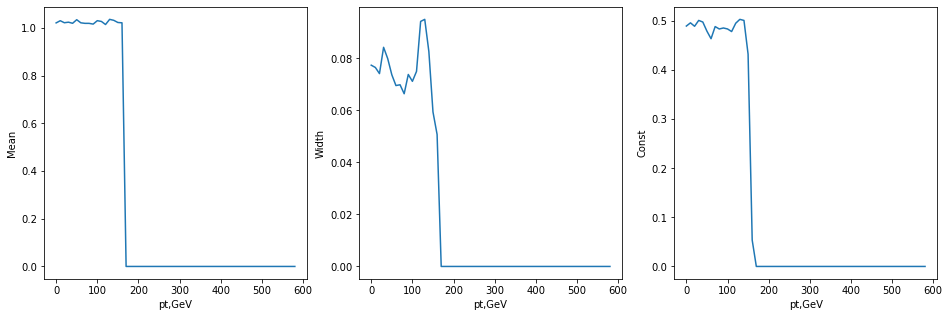

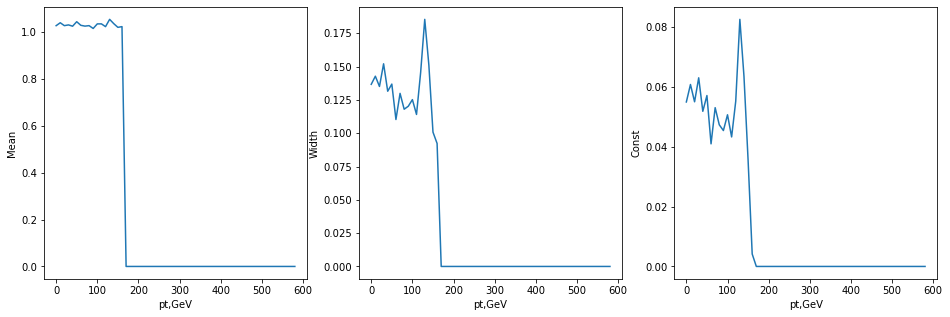

In [103]:
print('Gauss')
histfit.plotGaussparameters()
histfit.plotBWparameters()

In [101]:
histfit.showFit(18)

IndexError: list index out of range

In [67]:
meanlist = []
sigmalist = []
for h in hlist:
    frac_values = h.axes[2].centers
    count_values = h.project('frac').values()
    count_values = count_values/(np.sum(count_values)*frac_binwidth)
    parameters, covariance = curve_fit(gauss, frac_values, count_values,bounds = ([1,0.1],[1.5,0.4]))
    mean = parameters[0]
    sigma = parameters[1]
    meanlist.append(mean)
    sigmalist.append(sigma)

AttributeError: 'numpy.ndarray' object has no attribute 'axes'

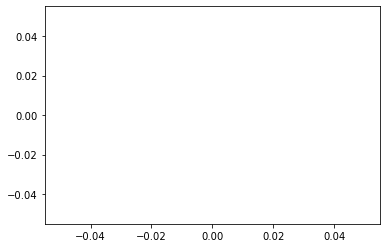

In [68]:
plt.scatter(np.arange(len(meanlist)),meanlist)

In [ ]:
plt.scatter(np.arange(len(meanlist)),sigmalist)

In [ ]:
for h in hlist:
    print(h.size)

In [ ]:
h = output['ptfrac_z_jet_gen']

hnew = h[:,4:5,:]
hnew.sum()




In [ ]:
hnew.project('frac')

In [ ]:
h = output['ptfrac_z_jet_gen']

hnew = h[sum,:,:]
hh = hnew[1:3,:]
hh2 = hnew[3:5,:]

In [ ]:
a = hh.project('frac').values()
b = hh2.project('frac').values()
plt.plot(a)
plt.plot(b)
print(np.sum(a)-np.sum(b))


In [ ]:
h.project('frac').plot()

In [ ]:
hnew = h[sum,:,:]
hh = hnew[2:3,:]
array2 = hh.values()

In [ ]:
array2.shape

In [ ]:
plt.plot(array2[0])

In [42]:
hlist[0][0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.35956747e-05, 7.29399053e-05,
       1.83988826e-04, 3.04699893e-04, 2.37256938e-04, 4.02994988e-04,
       4.87764660e-04, 8.24455042e-04, 9.54669718e-04, 1.06653140e-03,
       1.48542131e-03, 1.62183225e-03, 2.07883144e-03, 2.35815371e-03,
      

In [27]:
hlist[0][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])